SciPy
SciPy is a scientific computation library that uses NumPy underneath.
SciPy stands for Scientific Python.
It provides more utility functions for optimization, stats and signal processing.

Why Use SciPy?

If SciPy uses NumPy underneath, why can we not just use NumPy?
SciPy has optimized and added functions that are frequently used in NumPy and Data Science.

SciPy is predominantly written in Python, but a few segments are written in C.

In [12]:
# constants: SciPy offers a set of mathematical constants, one of them is liter which returns 1 liter as cubic meters.

from scipy import constants
print(constants.liter)
print(constants.pi)
# print(dir(constants)) # A list of all units under the constants module

0.001
3.141592653589793


=== SciPy Optimizers

** Optimizers are a set of procedures defined in SciPy that either find the minimum value of a function, or the root of an equation.

** Essentially, all of the algorithms in Machine Learning are nothing more than a complex equation that needs to be minimized with the help of given data.


=== Roots of an Equation

NumPy is capable of finding roots for polynomials and linear equations, but it can not find roots for non linear equations, like this one:

x + cos(x)

For that you can use SciPy's **optimize.root function.

** This function takes two required arguments:
fun - a function representing an equation.
x0 - an initial guess for the root.

The function returns an object with information regarding the solution.
The actual solution is given under attribute x of the returned object:

In [11]:
from scipy.optimize import root
import numpy as np 
# if we use from math import cos; it will need a scalar value, but scipy.optimize.root() passes an array. It will show warning.

def eqn(x):
    return x + np.cos(x)

rootFn = root(eqn, 0)
print(rootFn.x)
print(rootFn) # Print all information about the solution (not just x which is the root)

[-0.73908513]
 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-1.674e+00]
     qtf: [-2.668e-13]


=== Minimizing a Function
A function, in this context, represents a curve, curves have high points and low points.

High points are called maxima.

Low points are called minima.

**The highest point in the whole curve is called global maxima**, whereas the rest of them are called local maxima.

**The lowest point in whole curve is called global minima**, whereas the rest of them are called local minima.

Finding Minima
We can use **scipy.optimize.minimize()** function to minimize the function.

The minimize() function takes the following arguments:

fun - a function representing an equation.

x0 - an initial guess for the root.

method - name of the method to use. Legal values:
    'CG'
    'BFGS'
    'Newton-CG'
    'L-BFGS-B'
    'TNC'
    'COBYLA'
    'SLSQP'

callback - function called after each iteration of optimization.

options - a dictionary defining extra params:

{
     "disp": boolean - print detailed description
     "gtol": number - the tolerance of the error
  }

In [2]:
# example: 
# Minimize the function x^2 + x + 2 with BFGS:

from scipy.optimize import minimize, root

def eqn(x):
    return x**2 + x + 2

mymin = minimize(eqn, 0, method = 'BFGS')
myroot = root(eqn, 0)
print(mymin)
print(myroot.x)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.75
        x: [-5.000e-01]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4
[-0.49999999]


=== SciPy Sparse Data
Sparse data is data that has mostly unused elements (elements that don't carry any information ).
In scientific computing, when we are dealing with partial derivatives in linear algebra we will come across sparse data.

""" Sparse Data: is a data set where most of the item values are zero.
Dense Array: is the opposite of a sparse array: most of the values are not zero. """

How to Work With Sparse Data
SciPy has a module, scipy.sparse that provides functions to deal with sparse data.

There are primarily two types of sparse matrices that we use:

**CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.**

**CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products**

In [13]:
""" CSR Matrix
We can create CSR matrix by passing an arrray into function **scipy.sparse.csr_matrix().** """

## Sparse Matrix Methods

import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 1, 0], [0, 1, 2]])

print(csr_matrix(arr))
print('stored data : ', csr_matrix(arr).data) # Viewing stored data (not the zero items) with the data property
print('No. of non-zeros :', csr_matrix(arr).count_nonzero())

  (1, 1)	1
  (2, 1)	1
  (2, 2)	2
stored data :  [1 1 2]
No. of non-zeros : 3


In [ ]:
# Removing zero-entries from the matrix with the eliminate_zeros() method:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])
mat = csr_matrix(arr)
mat.eliminate_zeros()
mat.sum_duplicates() # Eliminating duplicates by adding them
newarr = csr_matrix(arr).tocsc() # Converting from csr to csc with the tocsc() method
print('mat(csr) :\n',mat)
print('newarr(csc) :\n', newarr)

""" 
# Note: Apart from the mentioned sparse specific operations, sparse matrices support all of the 
operations that normal matrices support e.g. reshaping, summing, arithemetic, broadcasting etc. """

mat(csr) :
   (1, 2)	1
  (2, 0)	1
  (2, 2)	2
newarr(csc) :
   (2, 0)	1
  (1, 2)	1
  (2, 2)	2


In [32]:
# SciPy Graphs
# SciPy provides us with the module scipy.sparse.csgraph for working with such data structures

""" Adjacency Matrix
Adjacency matrix is a nxn matrix where n is the number of elements in a graph.
And the values represents the connection between the elements. """

#      A
#     / \
#   1/   \2
#   B     C

# For a graph like this, with elements A, B and C, the connections are:
# A & B are connected with weight 1.
# A & C are connected with weight 2.
# C & B is not connected.

# The Adjency Matrix :

"""   A B C
   A:[0 1 2]  
   B:[1 0 0]
   C:[2 0 0] """

import numpy as np
from scipy.sparse.csgraph import connected_components 
from scipy.sparse import csr_matrix

arr = np.array([
    [0, 1, 2],
    [1, 0, 0],
    [2, 0, 0]
])

newarr = csr_matrix(arr)
print(connected_components(newarr)) # connected_components(): Finds clusters of connected nodes
# Note: Interpretation of Result:  1 connected group, all nodes belong to it

(1, array([0, 0, 0]))


In [ ]:
""" Dijkstra (method to find the shortest path in a graph from one element to another) """
# for ex :  When **Google Maps or a GPS device finds the **fastest route from your home to your office,
# it’s running a graph shortest-path algorithm like Dijkstra’s

""" It takes following arguments:

return_predecessors: boolean (True to return whole path of traversal otherwise False).
indices: index of the element to return all paths from that element only.
limit: max weight of path. """

# Example : Find the shortest path from element 1 to 2:

import numpy as np
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 3],
  [1, 0, 4],
  [3, 4, 0]
])

newarr = csr_matrix(arr)
dijk = dijkstra(newarr, return_predecessors=True, indices=0, limit=2)
print(dijk)
# result: inf = “This node cannot be reached within the given distance limit.”

(array([ 0.,  1., inf]), array([-9999,     0, -9999]))


In [ ]:
""" Floyd Warshall
Use the floyd_warshall() method to find shortest path between all pairs of elements. """

import numpy as np
from scipy.sparse.csgraph import floyd_warshall
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 10],
  [1, 0, 2],
  [10, 2, 0]
])

newarr = csr_matrix(arr)
floyd = floyd_warshall(newarr, return_predecessors=True)
print(floyd)

""" Result Explanation
From 0 → 2:
Direct path: 0 → 2 = 10
Indirect path: 0 → 1 → 2 = (0→1) + (1→2) = 1 + 2 = 3
The indirect path (via node 1) is much shorter. """

(array([[0., 1., 3.],
       [1., 0., 2.],
       [3., 2., 0.]]), array([[-9999,     0,     1],
       [    1, -9999,     1],
       [    1,     2, -9999]]))


In [ ]:
# bellman Ford
# The bellman_ford() method can also find the shortest path between all pairs of elements, but this method can handle negative weights as well.

import numpy as np
from scipy.sparse.csgraph import bellman_ford
from scipy.sparse import csr_matrix

arr = np.array([
  [0, -1, 10],
  [1, 0, 2],
  [10, 2, 0]
])

newarr = csr_matrix(arr)
bellman = bellman_ford(newarr, return_predecessors=True) # if we give indices=0 here, it will find shortest paths from node 0 to every other node
print(bellman)


(array([[ 0., -1.,  1.],
       [ 1.,  0.,  2.],
       [ 3.,  2.,  0.]]), array([[-9999,     0,     1],
       [    1, -9999,     1],
       [    1,     2, -9999]]))


# SciPy Spatial Data

**Spatial data refers to data that is represented in a geometric space.**

We deal with spatial data problems on many tasks.

E.g. finding if a point is inside a boundary or not.

SciPy provides us with the module **scipy.spatial**, which has functions for working with spatial data.

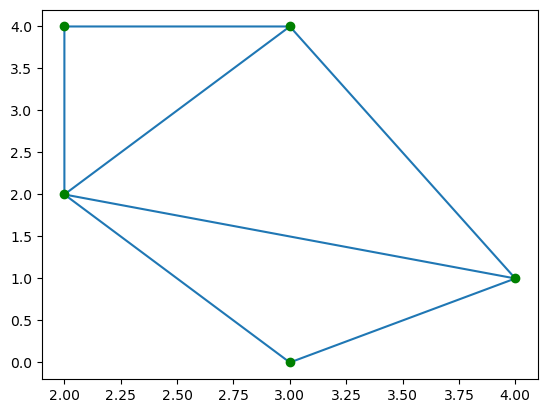

In [ ]:
""" Triangulation
A Triangulation of a polygon is to divide the polygon into multiple triangles with which we can compute an area of the polygon.
One method to generate these triangulations through points is the **Delaunay()** Triangulation. """
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

triangulate = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], triangulate)
plt.scatter(points[:, 0], points[:, 1], color='g')

plt.show()
#Note: The simplices property creates a generalization of the triangle notation.


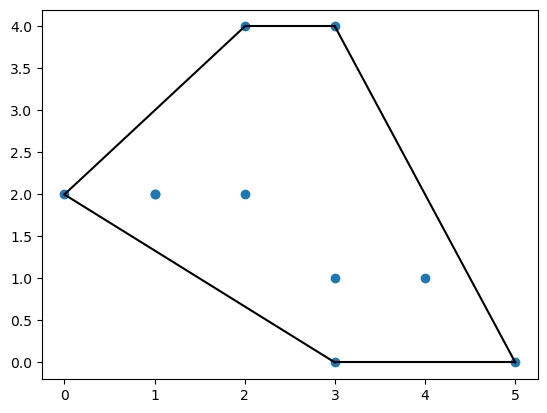

In [56]:
""" Convex Hull
A convex hull is the smallest polygon that covers all of the given points.

Use the ConvexHull() method to create a Convex Hull. """

import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1],
  [1, 2],
  [5, 0],
  [3, 1],
  [1, 2],
  [0, 2]
])

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

In [64]:
""" # KDTrees
KDTrees are a datastructure optimized for nearest neighbor queries.

E.g. in a set of points using KDTrees we can efficiently ask which points are nearest to a certain given point.

The KDTree() method returns a KDTree object.

The query() method returns the distance to the nearest neighbor and the location of the neighbors. """

from scipy.spatial import KDTree
points = [(1, -1), (2, 3), (-2, 3), (2, -3)]
kdtree = KDTree(points)
res = kdtree.query((1,1))
print(res)

# Result: (2.0, 0) Meaning: 2.0 → the shortest distance; 0 → the index of the nearest point in your list

(2.0, 0)


# Distance Matrix

There are many Distance Metrics used to find various types of distances between two points in data science, Euclidean distsance, cosine distsance etc.

The distance between two vectors may not only be the length of straight line between them, it can also be the angle between them from origin, or number of unit steps required etc.

Many of the Machine Learning algorithm's performance depends greatly on distance metrices. E.g. "K Nearest Neighbors", or "K Means" etc.

In [67]:
# Euclidean Distance
# Find the euclidean distance between given points.

from scipy.spatial.distance import euclidean

p1 = (0, 0)
p2 = (3, 4)

res = euclidean(p1, p2)

print(res)

5.0


In [68]:
""" Cityblock Distance (Manhattan Distance)
Is the distance computed using 4 degrees of movement.

E.g. we can only move: up, down, right, or left, not diagonally. """

from scipy.spatial.distance import cityblock

p1 = (0, 0)
p2 = (3, 4)

res = cityblock(p1, p2)

print(res)

7


In [73]:
""" Cosine Distance
Is the value of cosine angle between the two points A and B. """

from scipy.spatial.distance import cosine

p1 = (3, 4)
p2 = (3, 0)

res = cosine(p1, p2)

print(res)

0.4


In [74]:
""" Hamming Distance
Is the proportion of bits where two bits are different.

It's a way to measure distance for binary sequences. """

from scipy.spatial.distance import hamming

p1 = (True, False, True)
p2 = (False, True, True)

res = hamming(p1, p2)

print(res)

0.6666666666666666


# Working With Matlab Arrays

NumPy provides us with methods to persist the data in readable formats for Python. But SciPy provides us with interoperability with Matlab as well.

SciPy provides us with the module **scipy.io**, which has functions for working with Matlab arrays.


In [81]:
""" Exporting Data in Matlab Format
The savemat() function allows us to export data in Matlab format.

The method takes the following parameters:

filename - the file name for saving data.
mdict - a dictionary containing the data.
do_compression - a boolean value that specifies whether to compress the result or not. Default False. """

# Example: Export some array as variable name "vec" to a mat file:

from scipy import io
import numpy as np

arr = np.arange(10)

# Exporting
io.savemat('array.mat', {"vec": arr})
# It saves a file name "arr.mat" on your computer

# Importing
mydata = io.loadmat('array.mat')
print(mydata)
print(mydata['vec']) # to display only the array from the matlab data


{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Oct 11 22:13:17 2025', '__version__': '1.0', '__globals__': [], 'vec': array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])}
[[0 1 2 3 4 5 6 7 8 9]]


In [83]:
# Note: We can see that the array originally was 1D, but on extraction it has increased one dimension.
mydata = io.loadmat('array.mat', squeeze_me=True)

print(mydata['vec'])


[0 1 2 3 4 5 6 7 8 9]


# SciPy Interpolation

What is Interpolation?
Interpolation is a method for generating points between given points.

For example: for points 1 and 2, we may interpolate and find points 1.33 and 1.66.

Interpolation has many usage, in Machine Learning we often deal with missing data in a dataset, interpolation is often used to substitute those values.

This method of filling values is called **imputation**.

Apart from imputation, interpolation is often used where we need to smooth the discrete points in a dataset.

SciPy provides us with a module called **scipy.interpolate** which has many functions to deal with interpolation:


In [ ]:
""" 1D Interpolation
The function interp1d() is used to interpolate a distribution with 1 variable.

It takes x and y points and returns a callable function that can be called with new x and returns corresponding y.
"""

from scipy.interpolate import interp1d
import numpy as np

x = np.arange(10)
y = 2*x + 1

intp_fn = interp1d(x, y) # Make a function that can fill in missing values between x and y.
new1 = intp_fn(2.5) # Estimate what y would be if x=2.5, based on nearby points.
new2 = intp_fn(np.arange(2.1, 3, 0.05))
print('new1 :', new1)
print('new2 :', new2)

# Note: that new x should be in same range as of the old x, meaning that we can't call interp_func() with values higher than 10, or less than 0.


new1 : 6.0
new2 : [5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9]


In [ ]:
""" Spline Interpolation
In 1D interpolation the points are fitted for a single curve whereas in Spline interpolation the points are fitted against a piecewise function defined with polynomials called splines.

The UnivariateSpline() function takes x and y and produce a callable funciton that can be called with new x.
 """

# Piecewise function: A function that has different definition for different ranges.

# Example: Find univariate spline interpolation for 2.1, 2.2... 2.9 for the following non linear points:

import numpy as np
from scipy.interpolate import UnivariateSpline

x = np.arange(10)
y = x**2 + np.sin(x) + 1

intp_fn = UnivariateSpline(x, y)
new = intp_fn(np.arange(2.1, 3, 0.05))
print(new)


[5.62826474 5.83159227 6.03987348 6.25311412 6.47131994 6.69449671
 6.92265019 7.15578613 7.3939103  7.63702845 7.88514634 8.13826974
 8.39640439 8.65955607 8.92773053 9.20093353 9.47917082 9.76244817]


In [91]:
""" Interpolation with Radial Basis Function
Radial basis function is a function that is defined corresponding to a fixed reference point.

The Rbf() function also takes xs and ys as arguments and produces a callable function that can be called with new xs. """

from scipy.interpolate import Rbf
import numpy as np

x = np.arange(10)
y = x**2 + np.sin(x) + 1

intp_fn = Rbf(x, y)
new = intp_fn(np.arange(2.1, 3, 0.1))

print(new)

[6.25748981 6.62190817 7.00310702 7.40121814 7.8161443  8.24773402
 8.69590519 9.16070828 9.64233874]
